In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

train.shape, test.shape

((2266586, 6), (260114, 6))

In [3]:
def percentile(s):
    return np.sum(s) / len(s)

In [4]:
train

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225
...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836


# assessmentItemId 컬럼
데이터 형식 : A / 000 (대분류) / 000 (중분류?) / 000 (문제번호)

In [5]:
train['assessmentItemID'].apply(lambda x: x[1:])

0          060001001
1          060001002
2          060001003
3          060001004
4          060001005
             ...    
2266581    030071005
2266582    040165001
2266583    040165002
2266584    040165003
2266585    040165004
Name: assessmentItemID, Length: 2266586, dtype: object

In [6]:
test_class = train['assessmentItemID'].apply(lambda x: x[1:4])

In [7]:
cnt = 0
for i in range(len(test_class)):
    if (test_class[i][0] != '0') or (test_class[i][-1] != '0'):
        cnt += 1
print(cnt)

0


In [35]:
train['testMainCat'] = train['assessmentItemID'].apply(lambda x: x[2])
train['testSubCat'] = train['assessmentItemID'].apply(lambda x: x[4:7])
train['testProbNum'] = train['assessmentItemID'].apply(lambda x: x[7:])

In [111]:
train.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6,001,001
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6,001,002
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6,001,003
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6,001,004
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6,001,005


### assessmentItemId 대분류

In [39]:
train['testMainCat'].unique()

array(['6', '8', '2', '4', '9', '3', '5', '1', '7'], dtype=object)

In [3]:
main_cat_df = train.groupby('testMainCat').agg({'answerCode': 'mean', 'assessmentItemID': 'count'})
main_cat_df

,answerCode,assessmentItemID
testMainCat,,
1,0.800876,272082
2,0.737593,268327
3,0.702238,273762
4,0.684056,267323
5,0.658208,275773
6,0.709232,264434
7,0.521876,279164
8,0.502598,246336
9,0.449948,119385


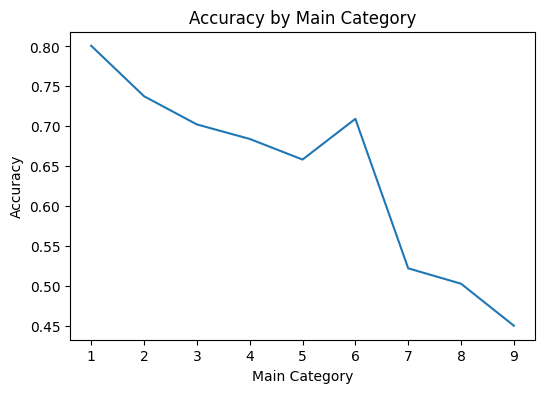

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=main_cat_df.index, y='answerCode', data=main_cat_df, ax=ax)
ax.set_xlabel('Main Category')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Main Category')
plt.show()

### assessmentItemId 중분류

In [10]:
train['testSubCat'].apply(lambda x: int(x)).nunique()

198

In [71]:
sub_cat_list = np.array(train['testSubCat'].apply(lambda x: int(x)).unique())
sub_cat_list.max(), sub_cat_list.min()

(198, 1)

In [12]:
sub_cat_df = train.groupby('testSubCat').agg({'answerCode': percentile, 'assessmentItemID': 'count'})
sub_cat_df

,answerCode,assessmentItemID
testSubCat,,
001,0.710348,14911
002,0.774011,12390
003,0.626930,16970
004,0.678803,12332
005,0.617519,16325
...,...,...
194,0.694145,2596
195,0.835409,4417
196,0.895706,1304


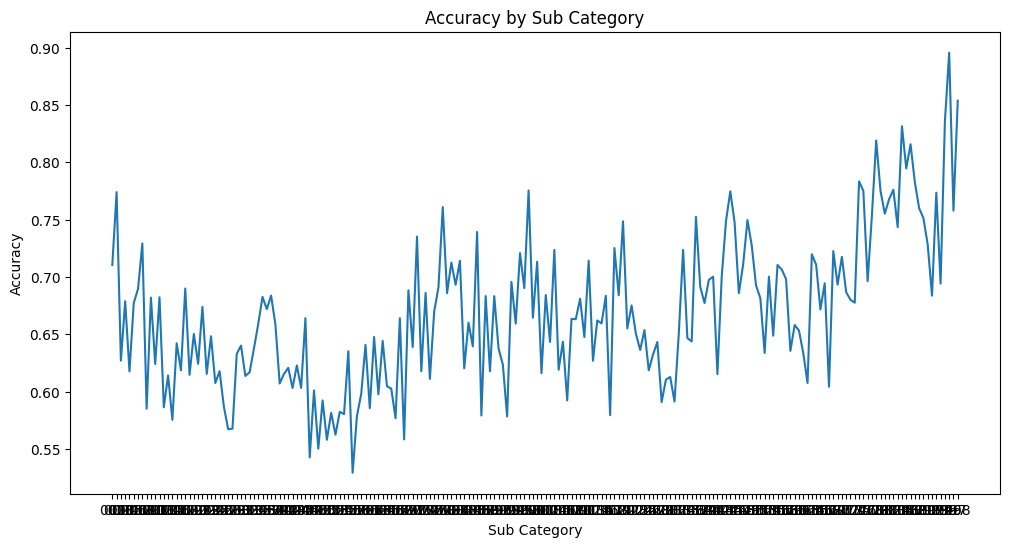

In [105]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x=sub_cat_df.index, y='answerCode', data=sub_cat_df, ax=ax)
plt.xticks(rotation=90)
ax.set_xlabel('Sub Category')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Sub Category')
plt.show()

In [12]:
category_df = train.groupby(['testMainCat', 'testSubCat']).agg({'answerCode': 'mean', 'assessmentItemID': 'count'})
category_df

answerCode  assessmentItemID
testMainCat testSubCat                              
1           001           0.926183              1585
            002           0.931613              1550
            003           0.846440              1615
            004           0.883117              1540
            005           0.855172              1595
...                            ...               ...
9           070           0.418605               344
            071           0.336111               360
            072           0.418519               270
            073           0.529630               270
            074           0.425926               270

[1537 rows x 2 columns]

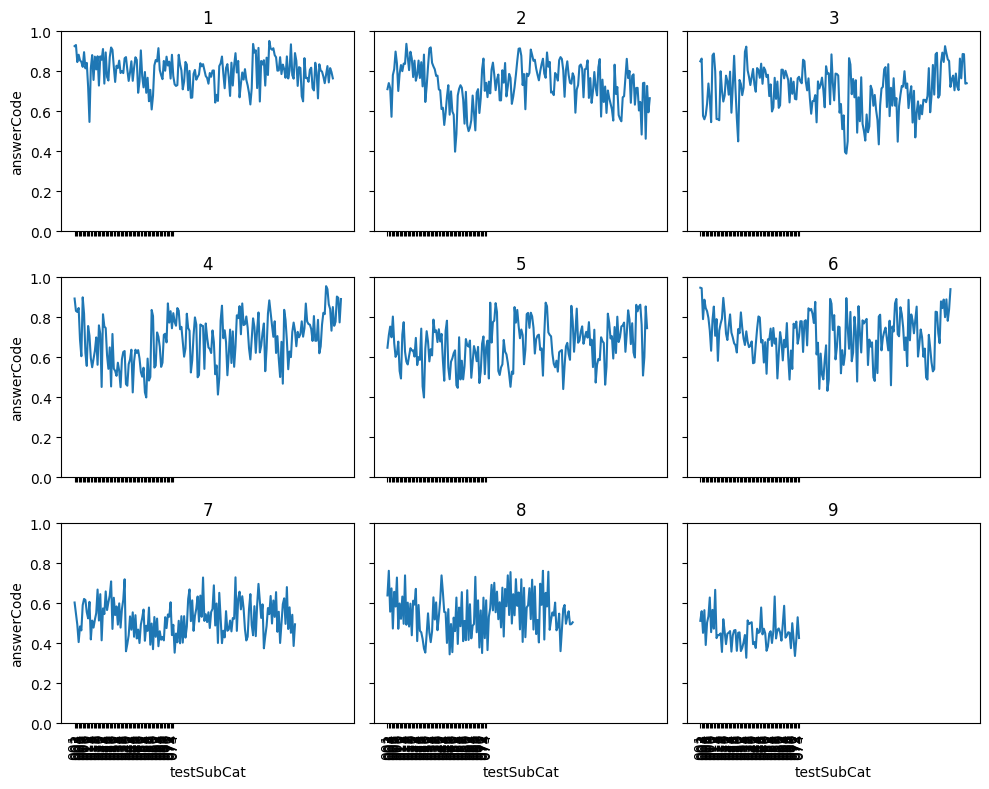

In [16]:
# 대분류별 subplot 생성
fig, axs = plt.subplots(3, 3, figsize=(10, 8), sharex=True, sharey=True)

# 대분류별 소분류별 정답률을 시각화
for i, cat in enumerate(category_df.index.levels[0]):
    row = i // 3
    col = i % 3
    data = category_df.loc[cat]
    sns.lineplot(x=data.index, y=data['answerCode'], ax=axs[row, col])
    axs[row, col].set_title(cat)
    axs[row, col].set_ylim([0.0, 1.0])
    axs[row, col].set_xticks(range(len(data.index)))
    axs[row, col].set_xticklabels(data.index, rotation=90)

plt.tight_layout()
plt.show()

In [106]:
category_df2 = train.groupby(['testSubCat', 'testMainCat']).agg({'answerCode': 'mean', 'assessmentItemID': 'count'})
category_df2

answerCode  assessmentItemID
testSubCat testMainCat                              
001        1              0.926183              1585
           2              0.710861              1335
           3              0.850558              1345
           4              0.893585              1325
           5              0.647619               315
...                            ...               ...
196        4              0.897321              1120
197        3              0.738462              1365
           4              0.774254              1608
198        3              0.740426               235
           4              0.891061               716

[1537 rows x 2 columns]

### assessmentItemId 문제번호

In [31]:
for i in range(1,10):
    main_cat = str(i)    
    max_prob_num = train[train['testMainCat']==main_cat]['testProbNum'].astype(int).max()
    min_prob_num = train[train['testMainCat']==main_cat]['testProbNum'].astype(int).min()
    print(f'대분류 {main_cat}의 문제번호: {min_prob_num} ~ {max_prob_num}')

대분류 1의 문제번호: 1 ~ 8
대분류 2의 문제번호: 1 ~ 10
대분류 3의 문제번호: 1 ~ 11
대분류 4의 문제번호: 1 ~ 13
대분류 5의 문제번호: 1 ~ 10
대분류 6의 문제번호: 1 ~ 11
대분류 7의 문제번호: 1 ~ 12
대분류 8의 문제번호: 1 ~ 11
대분류 9의 문제번호: 1 ~ 8


In [18]:
prob_num_df = train.groupby(['testMainCat', 'testProbNum']).agg({'answerCode': 'mean', 'assessmentItemID': 'count'})
prob_num_df

answerCode  assessmentItemID
testMainCat testProbNum                              
1           001            0.862619             53217
            002            0.844214             52540
            003            0.825638             53171
            004            0.762703             52862
            005            0.707163             49758
...                             ...               ...
9           004            0.423965             17058
            005            0.437976             17058
            006            0.431938             17058
            007            0.437806              8586
            008            0.376893              8586

[94 rows x 2 columns]

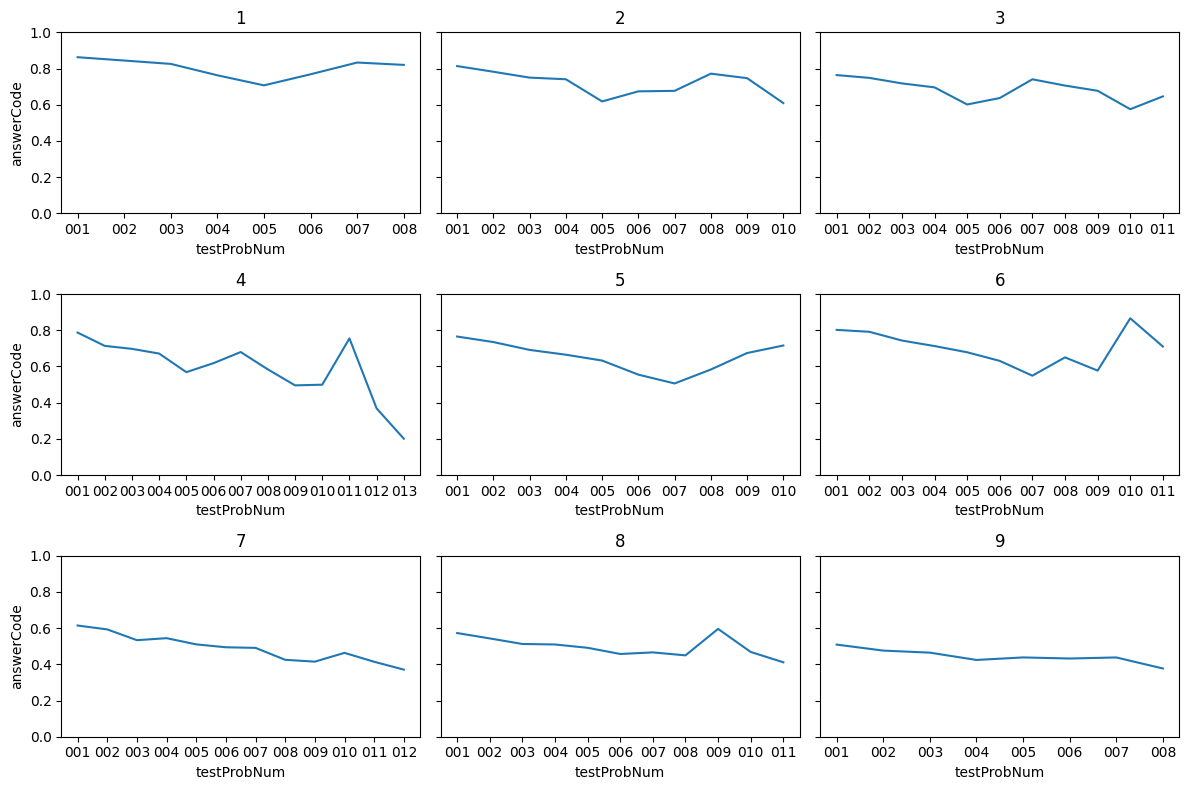

In [22]:
# 대분류별 subplot 생성
fig, axs = plt.subplots(3, 3, figsize=(12, 8), sharex=False, sharey=True)

# 대분류별 소분류별 정답률을 시각화
for i, cat in enumerate(prob_num_df.index.levels[0]):
    row = i // 3
    col = i % 3
    data = prob_num_df.loc[cat]
    sns.lineplot(x=data.index, y=data['answerCode'], ax=axs[row, col])
    axs[row, col].set_title(cat)
    axs[row, col].set_ylim([0.0, 1.0])
    axs[row, col].set_xticks(range(len(data.index)))
    axs[row, col].set_xticklabels(data.index)

plt.tight_layout()
plt.show()

# Timestamp 컬럼
해당 문제를 풀기 "시작"한 시간

In [16]:
import time
from datetime import datetime
from typing import Tuple

def convert_time(s: str):
    timestamp = time.mktime(
        datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple()
    )
    return int(timestamp)

In [ ]:
# diff = df.loc[:, ['userID', 'Timestamp']].groupby('userID').diff().fillna(pd.Timedelta(seconds=0))
# diff = diff.fillna(pd.Timedelta(seconds=0))
# diff = diff['Timestamp'].apply(lambda x: x.total_seconds())

# df['elapsed'] = diff

In [17]:
def calculate_time(df: pd.DataFrame, index: int):
    if index == len(df) -1:
        time = np.nan
    else:
        if df.iloc[i, 2] == df.iloc[i+1, 2]:
            time = df.iloc[i+1, 4] - df.iloc[i, 4]
        else:
            time = np.nan
    return time

In [18]:
train["Timestamp"] = train["Timestamp"].apply(convert_time)

In [19]:
for i in range(len(train)):
    train.iloc[i, 4] = calculate_time(train, i)

In [ ]:
train.to_csv('train1.csv', index=None)

In [38]:
train = pd.read_csv('train1.csv')

In [42]:
train.head(8)

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
0,0,A060001001,A060000001,1,3.0,7224,6,1,1
1,0,A060001002,A060000001,1,8.0,7225,6,1,2
2,0,A060001003,A060000001,1,7.0,7225,6,1,3
3,0,A060001004,A060000001,1,7.0,7225,6,1,4
4,0,A060001005,A060000001,1,11.0,7225,6,1,5
5,0,A060001007,A060000001,1,NaN,7225,6,1,7
6,0,A060003001,A060000003,0,7.0,7226,6,3,1
7,0,A060003002,A060000003,1,64.0,7226,6,3,2


In [6]:
train.isna().sum()

userID                   0
assessmentItemID         0
testId                   0
answerCode               0
Timestamp           374594
KnowledgeTag             0
testMainCat              0
testSubCat               0
testProbNum              0
dtype: int64

In [9]:
train[['userID', 'testId']].groupby(['userID', 'testId']).count()

Empty DataFrame
Columns: []
Index: [(0, A020000172), (0, A020000174), (0, A020000181), (0, A020000182), (0, A020000183), (0, A020000192), (0, A060000001), (0, A060000003), (0, A060000005), (0, A060000007), (0, A060000009), (0, A060000016), (0, A060000018), (0, A060000020), (0, A060000022), (0, A060000024), (0, A060000031), (0, A060000033), (0, A060000035), (0, A060000037), (0, A060000039), (0, A060000041), (0, A060000043), (0, A060000052), (0, A060000054), (0, A060000056), (0, A060000058), (0, A060000060), (0, A060000062), (0, A060000070), (0, A060000072), (0, A060000074), (0, A060000076), (0, A060000078), (0, A060000085), (0, A060000087), (0, A060000089), (0, A060000091), (0, A060000093), (0, A060000094), (0, A060000095), (0, A060000096), (0, A060000097), (0, A060000099), (0, A060000101), (0, A060000103), (0, A060000105), (0, A060000107), (0, A060000115), (0, A060000119), (0, A060000121), (0, A060000123), (0, A060000125), (0, A060000127), (0, A060000129), (0, A060000131), (0, A080000002), (0, A080000004), (0, A080000006), (0, A080000008), (0, A080000010), (0, A080000012), (0, A080000014), (0, A080000016), (0, A080000018), (0, A080000020), (0, A080000022), (0, A080000024), (0, A080000035), (0, A080000036), (0, A080000037), (0, A080000038), (0, A080000039), (0, A080000040), (0, A080000041), (0, A080000042), (0, A080000043), (0, A080000044), (0, A080000046), (0, A080000048), (0, A080000062), (0, A080000070), (0, A080000072), (0, A080000076), (0, A080000078), (0, A080000080), (0, A080000082), (0, A080000084), (0, A080000086), (0, A080000088), (0, A080000090), (0, A080000092), (0, A080000094), (0, A080000096), (0, A080000098), (0, A080000100), (0, A080000102), (0, A080000108), (0, A080000112), (0, A080000114), ...]

[365164 rows x 0 columns]

In [46]:
user_q = train.groupby(['userID', 'assessmentItemID'])[['answerCode']].count()
user_q['answerCode'].unique()

array([1, 2, 3])

In [47]:
user_q[user_q['answerCode'] != 1]

answerCode
userID assessmentItemID            
1      A040155001                 2
       A040155002                 2
       A040155003                 2
       A040155004                 2
       A040155005                 2
...                             ...
6977   A040167005                 2
7329   A040198001                 2
       A040198002                 2
       A040198003                 2
       A040198004                 2

[45119 rows x 1 columns]

In [31]:
train[train['userID']==7329] # 같은 시험을 두번 푼 학생

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
2264849,7329,A040198001,A040000198,0,5.0,2133,4,198,1
2264850,7329,A040198002,A040000198,1,10.0,2133,4,198,2
2264851,7329,A040198003,A040000198,1,8.0,2133,4,198,3
2264852,7329,A040198004,A040000198,1,NaN,2133,4,198,4
2264853,7329,A010014001,A010000014,1,24.0,5834,1,14,1
2264854,7329,A010014002,A010000014,1,18.0,5834,1,14,2
2264855,7329,A010014003,A010000014,1,44.0,5834,1,14,3
2264856,7329,A010014004,A010000014,1,19.0,5834,1,14,4
2264857,7329,A010014005,A010000014,1,NaN,5834,1,14,5
2264858,7329,A040196001,A040000196,1,5.0,2131,4,196,1


In [48]:
con = train['Timestamp'].notnull()
time_df = train[con]

In [49]:
time_df.groupby(['testMainCat', 'testProbNum'])['Timestamp'].mean()

testMainCat  testProbNum
1            1                88.207968
             2                87.373431
             3                90.578067
             4                87.258647
             5               409.226942
                               ...     
9            4               189.903996
             5               127.960022
             6               297.322458
             7                74.167112
             8              7339.369582
Name: Timestamp, Length: 94, dtype: float64

In [54]:
con1 = time_df['testMainCat'] == 9
con2 = time_df['testProbNum'] == 8
time_df[con1 & con2]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
1150,1,A090035008,A090000035,1,556.0,10760,9,35,8
1596,1,A090054008,A090000054,1,32.0,9923,9,54,8
7084,12,A090001008,A090000001,0,1.0,4697,9,1,8
7102,12,A090003008,A090000003,1,1.0,4699,9,3,8
7214,12,A090016008,A090000016,0,2.0,4210,9,16,8
...,...,...,...,...,...,...,...,...,...
2246678,6661,A090003008,A090000003,0,85.0,4699,9,3,8
2254521,6875,A090003008,A090000003,1,2.0,4699,9,3,8
2254535,6875,A090009008,A090000009,0,1.0,4723,9,9,8
2254544,6875,A090011008,A090000011,0,3.0,9728,9,11,8


In [64]:
time_df[con1 & con2]['Timestamp'].max()

4553584.0

In [65]:
time_df[con1 & con2][time_df[con1 & con2]['Timestamp']==4553584.0]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
2231986,6319,A090001008,A090000001,0,4553584.0,4697,9,1,8


In [68]:
train.iloc[2231979:2231999] # 문제푸는 순서가 다를수도 있다

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
2231979,6319,A090001001,A090000001,0,28.0,4697,9,1,1
2231980,6319,A090001002,A090000001,1,20.0,4697,9,1,2
2231981,6319,A090001003,A090000001,1,42.0,10174,9,1,3
2231982,6319,A090001004,A090000001,1,20.0,78,9,1,4
2231983,6319,A090001005,A090000001,1,97.0,78,9,1,5
2231984,6319,A090001006,A090000001,1,22.0,78,9,1,6
2231985,6319,A090001007,A090000001,1,40.0,4697,9,1,7
2231986,6319,A090001008,A090000001,0,4553584.0,4697,9,1,8
2231987,6319,A090001001,A090000001,1,9.0,4697,9,1,1
2231988,6319,A090001002,A090000001,1,36.0,4697,9,1,2


In [51]:
con = train['Timestamp'] > 3600
train[con]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
619,0,A080102001,A080000102,1,3998.0,7170,8,102,1
780,1,A040037003,A040000037,0,3765.0,2067,4,37,3
798,1,A040049001,A040000049,1,3939.0,2071,4,49,1
800,1,A040049003,A040000049,1,7905.0,2071,4,49,3
1119,1,A040050002,A040000050,1,8242.0,2071,4,50,2
...,...,...,...,...,...,...,...,...,...
2263269,7243,A050080003,A050000080,1,21085.0,10328,5,80,3
2263724,7269,A030018001,A030000018,1,9566.0,7309,3,18,1
2264826,7328,A050086004,A050000086,0,8902.0,10335,5,86,4
2265670,7380,A060179002,A060000179,0,7199.0,1581,6,179,2


In [81]:
con = train['Timestamp'] < 0
train[con]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
2103163,4818,A040149005,A040000149,0,-6985823.0,2114,4,149,5
2116314,4919,A030193009,A030000193,1,-14050978.0,1982,3,193,9
2259248,7047,A070163008,A070000163,0,-16956480.0,9125,7,163,8


In [82]:
train.iloc[2103160:2103169]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
2103160,4818,A040149002,A040000149,1,16498.0,2114,4,149,2
2103161,4818,A040149003,A040000149,1,264.0,2114,4,149,3
2103162,4818,A040149004,A040000149,0,16.0,2114,4,149,4
2103163,4818,A040149005,A040000149,0,-6985823.0,2114,4,149,5
2103164,4821,A040149001,A040000149,1,50.0,2114,4,149,1
2103165,4821,A040149002,A040000149,1,1928.0,2114,4,149,2
2103166,4821,A040149003,A040000149,1,170.0,2114,4,149,3
2103167,4821,A040149004,A040000149,1,2407.0,2114,4,149,4
2103168,4821,A040149005,A040000149,1,NaN,2114,4,149,5


# KnowledgeTag 컬럼

In [18]:
train['KnowledgeTag'].nunique()

912

In [37]:
display(train.groupby('testMainCat')[['KnowledgeTag']].nunique())
train.groupby('testMainCat')[['KnowledgeTag']].nunique()['KnowledgeTag'].sum()

,KnowledgeTag
testMainCat,
1,64
2,70
3,85
4,81
5,98
6,93
7,176
8,150
9,96


913

In [52]:
tag_groupby = train.groupby(['KnowledgeTag']).agg({
    'userID': 'count',
    'answerCode': 'mean',
    'testMainCat': 'mean'
})
tag_groupby

,userID,answerCode,testMainCat
KnowledgeTag,,,
23,1800,0.584444,8.0
24,358,0.614525,8.0
25,92,0.858696,8.0
26,2432,0.614309,8.0
30,539,0.536178,8.0
...,...,...,...
11253,4282,0.739374,4.0
11265,454,0.676211,4.0
11269,2417,0.557716,4.0


In [53]:
tag_groupby['testMainCat'].unique()

array([8.        , 9.        , 7.        , 5.        , 3.        ,
       6.        , 4.        , 1.        , 2.        , 7.07138935])

In [50]:
tag_groupby[(tag_groupby['testMainCat'] > 7) & (tag_groupby['testMainCat'] < 8)]

,userID,answerCode,testMainCat
KnowledgeTag,,,
7863,1821,0.543108,7.071389


In [51]:
train[train['KnowledgeTag']==7863]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
230,0,A080037007,A080000037,0,3.0,7863,8,37,7
5893,9,A070150003,A070000150,1,42.0,7863,7,150,3
5894,9,A070150004,A070000150,1,171.0,7863,7,150,4
5901,9,A070152003,A070000152,1,154.0,7863,7,152,3
5911,9,A070154005,A070000154,1,9.0,7863,7,154,5
...,...,...,...,...,...,...,...,...,...
2262727,7213,A070152003,A070000152,0,1.0,7863,7,152,3
2262904,7223,A070151007,A070000151,1,2.0,7863,7,151,7
2265424,7360,A070149003,A070000149,0,2.0,7863,7,149,3
2265425,7360,A070149004,A070000149,0,2.0,7863,7,149,4


In [58]:
train[(train['testId'] == 'A080000037') & (train['KnowledgeTag'] == 7863)]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
230,0,A080037007,A080000037,0,3.0,7863,8,37,7
35089,48,A080037007,A080000037,0,22.0,7863,8,37,7
38639,51,A080037007,A080000037,1,NaN,7863,8,37,7
40888,54,A080037007,A080000037,0,2.0,7863,8,37,7
45991,61,A080037007,A080000037,1,57.0,7863,8,37,7
...,...,...,...,...,...,...,...,...,...
2186624,5605,A080037007,A080000037,1,57.0,7863,8,37,7
2201432,5790,A080037007,A080000037,1,3.0,7863,8,37,7
2240726,6507,A080037007,A080000037,1,2183.0,7863,8,37,7
2240978,6514,A080037007,A080000037,0,177.0,7863,8,37,7


In [72]:
train.iloc[224:232]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,testMainCat,testSubCat,testProbNum
224,0,A080037001,A080000037,0,236.0,4686,8,37,1
225,0,A080037002,A080000037,1,117.0,4686,8,37,2
226,0,A080037003,A080000037,1,14.0,4686,8,37,3
227,0,A080037004,A080000037,0,3.0,4686,8,37,4
228,0,A080037005,A080000037,1,63.0,4686,8,37,5
229,0,A080037006,A080000037,0,2.0,4686,8,37,6
230,0,A080037007,A080000037,0,3.0,7863,8,37,7
231,0,A080037008,A080000037,1,NaN,4686,8,37,8


In [79]:
tag_groupby = train.groupby(['KnowledgeTag', 'testMainCat']).agg({
    'userID': 'count',
    'answerCode': 'mean',
})
tag_groupby

,,userID,answerCode
KnowledgeTag,testMainCat,,
23,8,1800,0.584444
24,8,358,0.614525
25,8,92,0.858696
26,8,2432,0.614309
30,8,539,0.536178
...,...,...,...
11253,4,4282,0.739374
11265,4,454,0.676211
11269,4,2417,0.557716


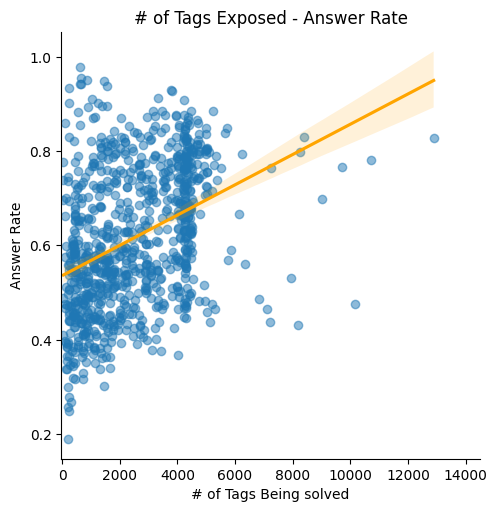

In [80]:
g = sns.lmplot(
    data=tag_groupby,
    x='userID',
    y='answerCode',
    scatter_kws={'alpha':0.5},
    line_kws={"color": "orange"}
)
g.set_xlabels('# of Tags Being solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 14500))

ax = plt.gca()
ax.set_title('# of Tags Exposed - Answer Rate');

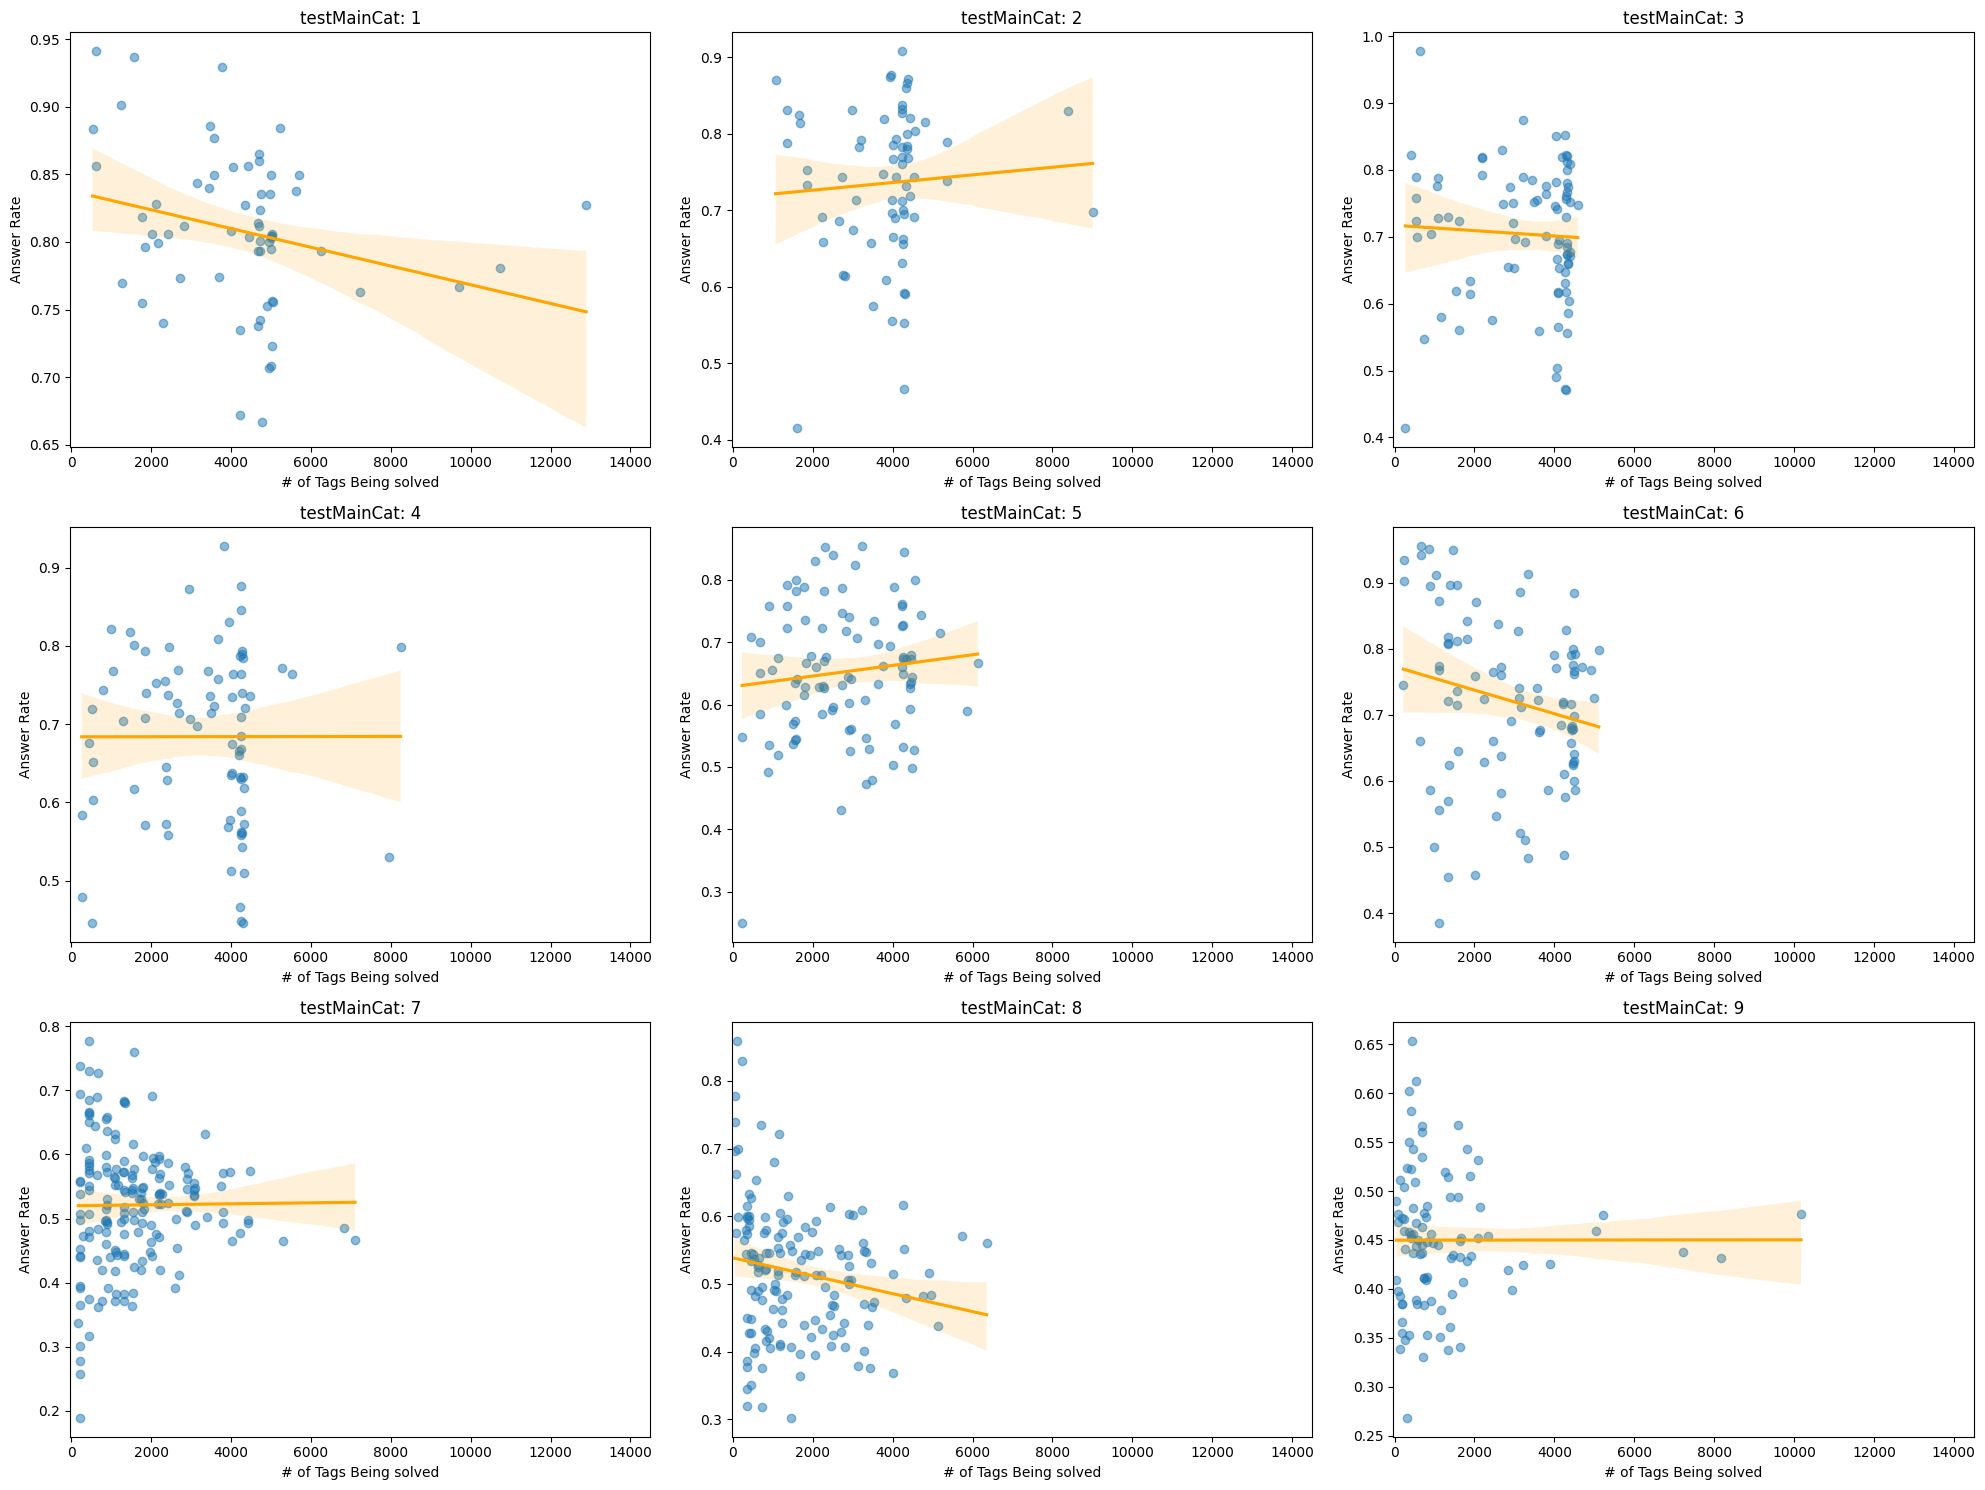

In [85]:
# 그래프를 그릴 전체 subplot 생성
fig, axs = plt.subplots(3, 3, figsize=(20, 15))

# testMainCat을 기준으로 데이터를 그룹화하여 각각의 subplot에 그래프 그리기
for i, (cat, df) in enumerate(tag_groupby.groupby('testMainCat')):
    row, col = i // 3, i % 3
    sns.regplot(
        data=df,
        x='userID',
        y='answerCode',
        scatter_kws={'alpha':0.5},
        line_kws={"color": "orange"},
        ax=axs[row, col]
    )
    axs[row, col].set_title(f"testMainCat: {cat}")
    axs[row, col].set_xlabel('# of Tags Being solved')
    axs[row, col].set_ylabel('Answer Rate')
    axs[row, col].set_xlim(-30, 14500)
plt.tight_layout()
plt.show()


In [89]:
stu_groupby = train.groupby(['userID', 'testMainCat']).agg({
    'assessmentItemID': 'count',
    'answerCode': percentile
})
stu_groupby

assessmentItemID  answerCode
userID testMainCat                              
0      2                          36    0.722222
       6                         346    0.791908
       8                         363    0.468320
1      4                         581    0.822719
       9                         352    0.903409
...                              ...         ...
7438   8                           6    0.666667
7440   3                          10    0.400000
       5                           5    0.400000
7441   3                           5    0.200000
       4                           4    1.000000

[17752 rows x 2 columns]

Text(0.5, 1.0, '# of Questions - Answer Rate')

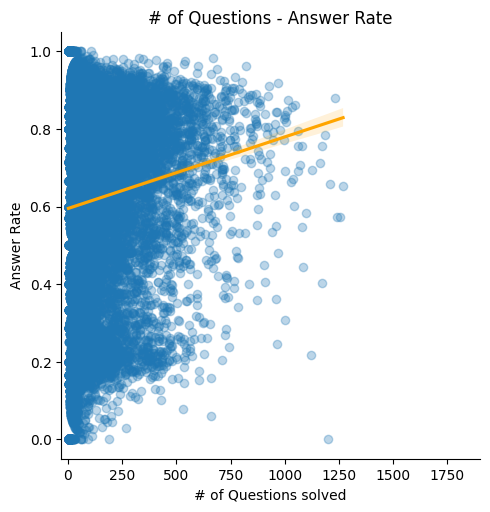

In [117]:
g = sns.lmplot(
    data=stu_groupby,
    x='assessmentItemID',
    y='answerCode',
    scatter_kws={'alpha':0.3},
    line_kws={"color": "orange"}
)
g.set_xlabels('# of Questions solved')
g.set_ylabels('Answer Rate')
g.set(xlim=(-30, 1900))

ax = plt.gca()
ax.set_title('# of Questions - Answer Rate')

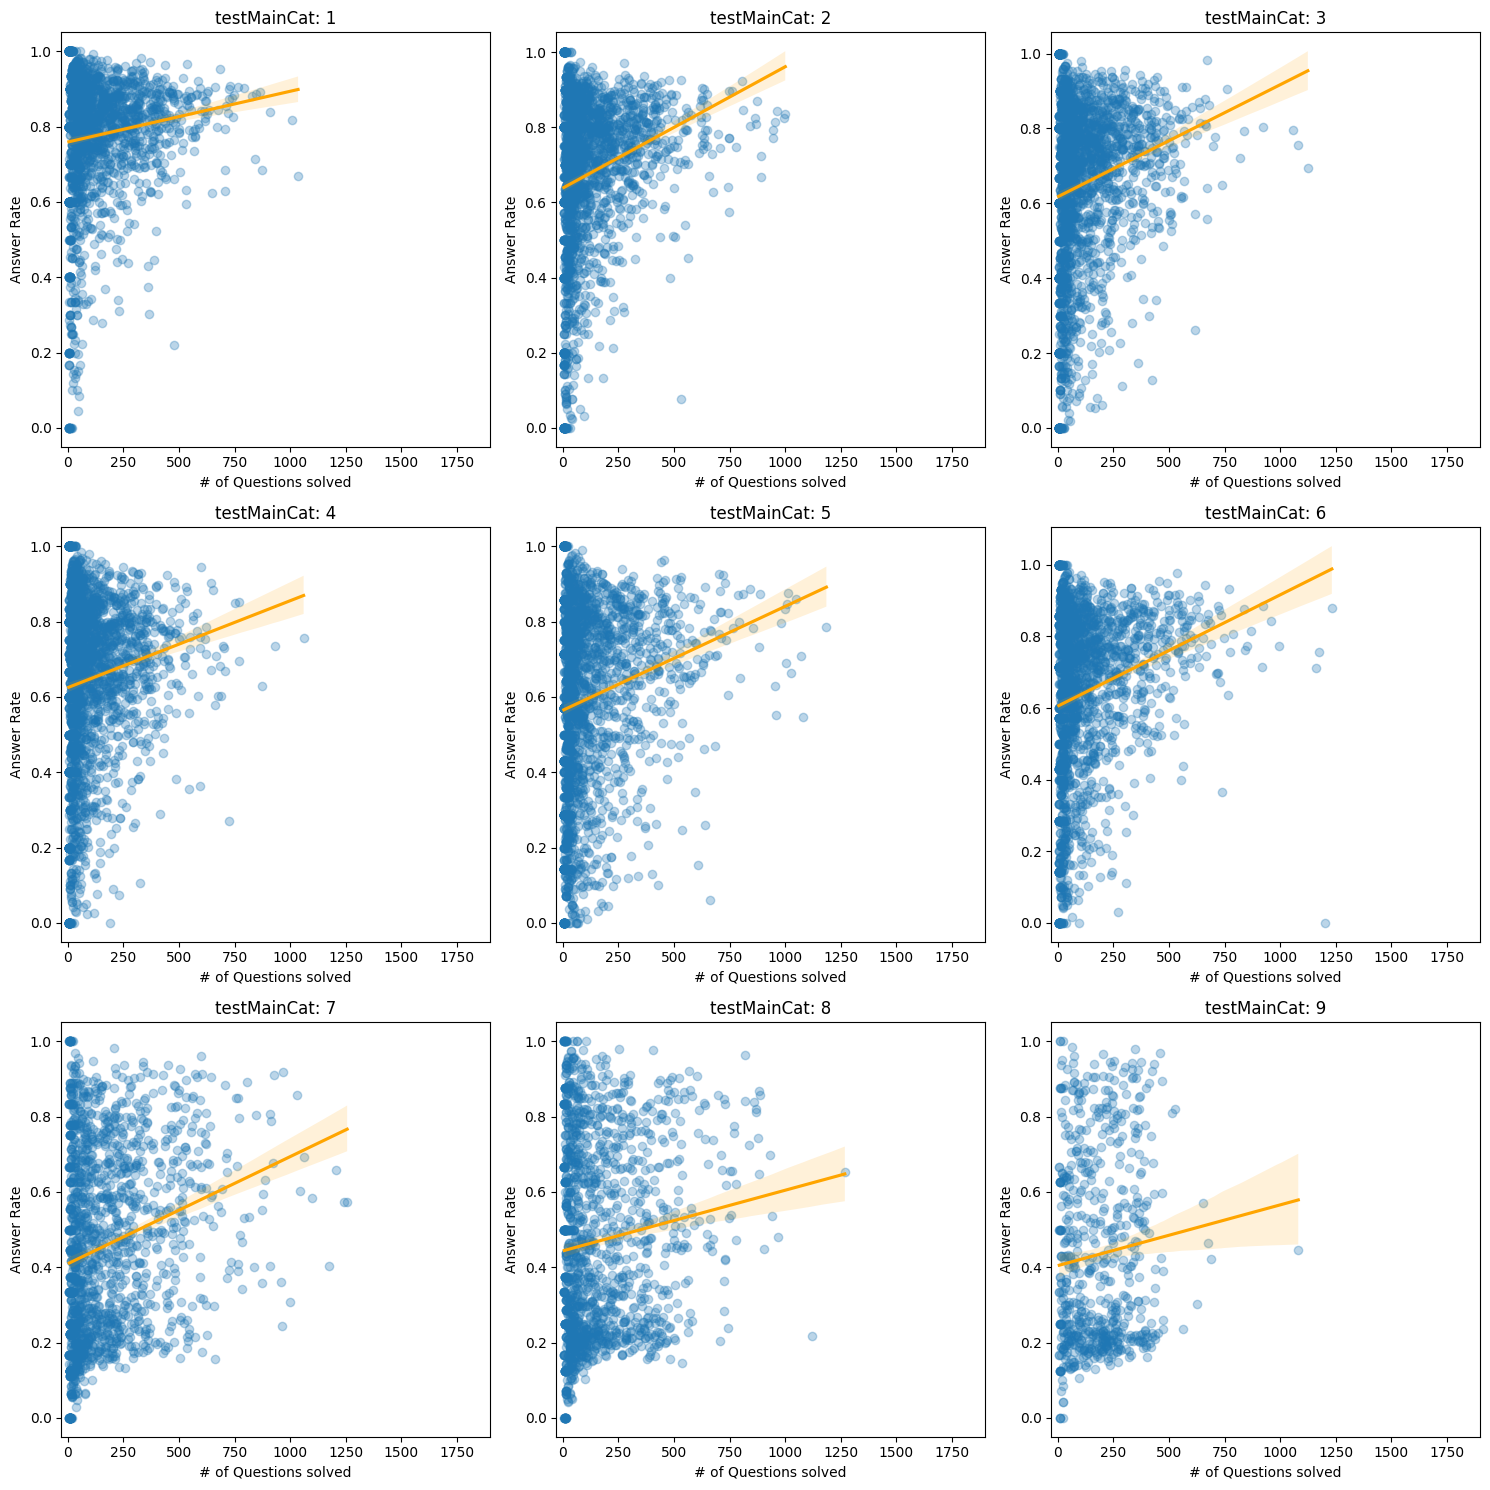

In [115]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, (group, data) in enumerate(stu_groupby.groupby('testMainCat')):
    row, col = i // 3, i % 3
    
    g = sns.regplot(
        data=data,
        x='assessmentItemID',
        y='answerCode',
        scatter_kws={'alpha':0.3},
        line_kws={"color": "orange"},
        ax=axs[row, col]
    )
    axs[row, col].set_title(f"testMainCat: {group}")
    axs[row, col].set_xlabel('# of Questions solved')
    axs[row, col].set_ylabel('Answer Rate')
    axs[row, col].set_xlim(-30, 1900)
    
fig.tight_layout()
plt.show()
